Objective:

The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.



# Data preparation  


In [4]:
pip install xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
#importing dataset
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

data=pd.read_csv('heart disease.csv')

In [3]:
#head of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# EDA

In [4]:
#structure of data
data.shape

(908, 13)

In [5]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
#checking for nmissing values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
#handling missing values
data['oldpeak'].fillna(data['oldpeak'].mean(),inplace=True)

In [12]:
#checking for duplicates
data.duplicated().sum()

0

In [13]:
#statistical summary of data
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

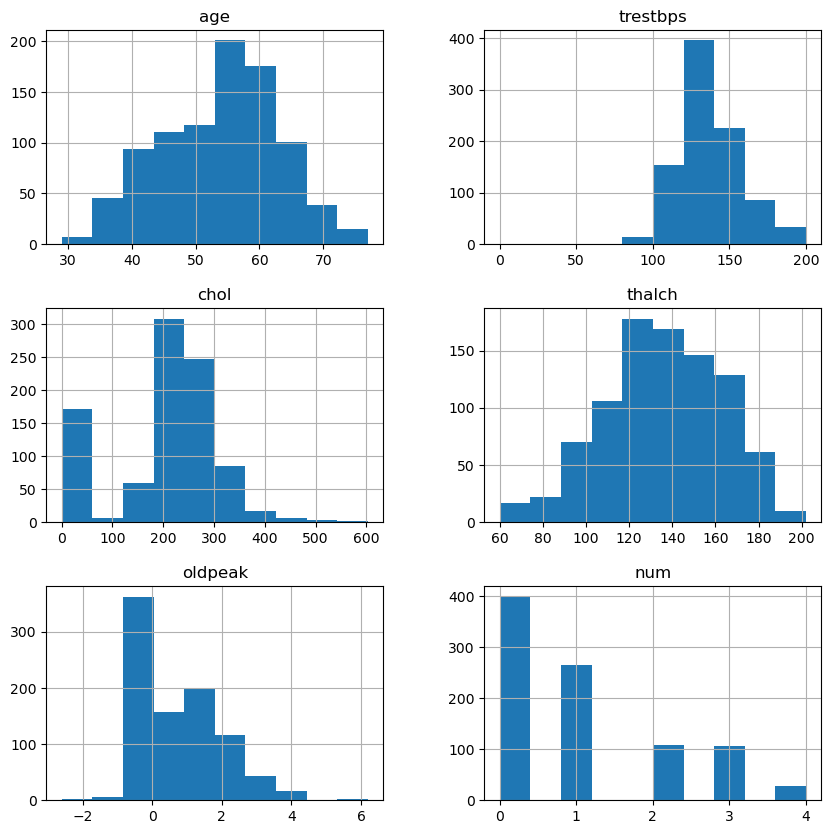

In [14]:
#visualization using histogram
import matplotlib.pyplot as plt
import seaborn as sns
data.hist(figsize=(10,10))

Analysis from histogram:

1) age: symmetric distribution, centered at age 50-60

2) trestbps: right-skewed, most people have resting blood pressure between 120-140 mm Hg

3) chol: right-skewed, large number of individuals have cholestrol levels around 200 mg/dL. Only few have very high cholestrol

4) thalch: slightly left-skewed

5) oldpeak: right-skewed, most have low ST depression values 0-1

6) num: categorical distribution, target variable

age            Axes(0.125,0.11;0.110714x0.77)
trestbps    Axes(0.257857,0.11;0.110714x0.77)
chol        Axes(0.390714,0.11;0.110714x0.77)
thalch      Axes(0.523571,0.11;0.110714x0.77)
oldpeak     Axes(0.656429,0.11;0.110714x0.77)
num         Axes(0.789286,0.11;0.110714x0.77)
dtype: object

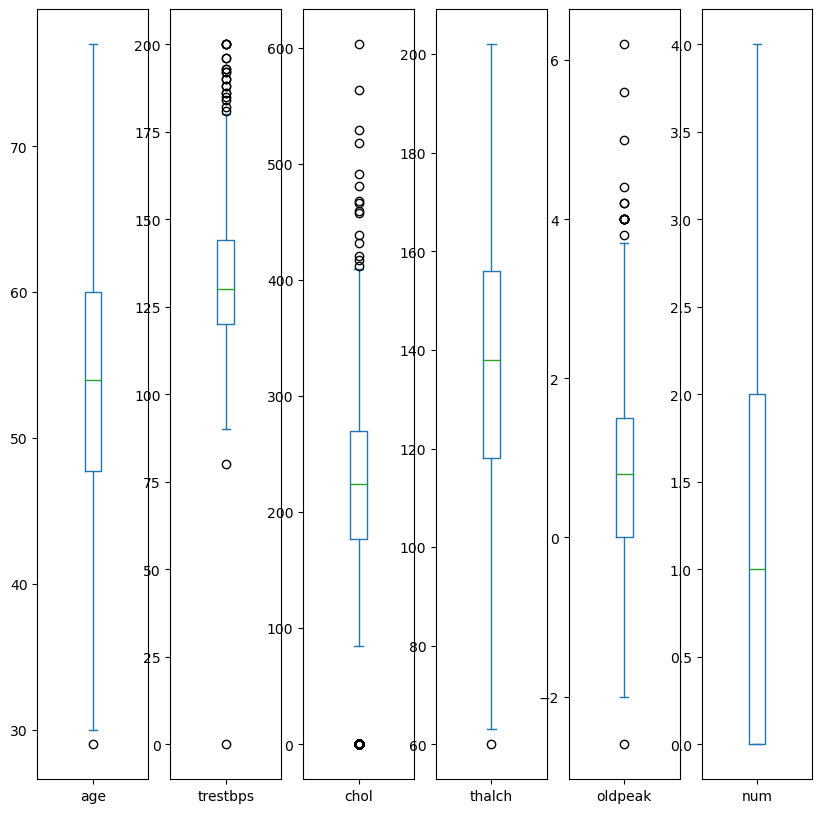

In [15]:
#visualization using boxplot
data.plot(kind='box',subplots=True,figsize=(10,10))

Analysis of boxplot:

num - no outliers
age, thalch - very few outliers at lower end
oldpeak, trestbps - few outliers at lower end and more at higher end
chol - several outliers at higher end

# Feature engineering 

In [16]:
#using label encoding technique to convert columns to numeric
from sklearn.preprocessing import LabelEncoder

In [19]:
#label encoder
le=LabelEncoder()

#changing exang from boolean to string for encoding
data['exang']=data['exang'].astype(str)

#converting columns to numeric using label encoder
data['sex']=le.fit_transform(data['sex'])
data['cp']=le.fit_transform(data['cp'])
data['fbs']=le.fit_transform(data['fbs'])
data['restecg']=le.fit_transform(data['restecg'])
data['exang']=le.fit_transform(data['exang'])
data['oldpeak']=le.fit_transform(data['oldpeak'])
data['slope']=le.fit_transform(data['slope'])
data['thal']=le.fit_transform(data['thal'])

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,34,0,0,0
1,41,1,1,135,203,0,1,132,0,10,1,0,0
2,57,1,0,140,192,0,1,148,0,14,1,0,0
3,52,1,3,118,186,0,0,190,0,10,1,0,0
4,57,1,0,110,201,0,1,126,1,26,1,0,0


In [20]:
#correlation matrix
corr=data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.238852,-0.054644,0.069657,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.110374,-0.045065,0.035037,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.176200,0.092177,-0.109457,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.143006,0.006748,0.005171,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.014087,0.047292,-0.051614,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.030794,-0.026636,0.029516,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.027107,-0.084796,-0.088346,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.141465,0.224048,-0.061383,-0.323058
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.329617,-0.149261,0.104426,0.327403
oldpeak,0.238852,0.110374,-0.176200,0.143006,0.014087,0.030794,-0.027107,-0.141465,0.329617,1.000000,-0.182776,0.075810,0.422298


<Axes: >

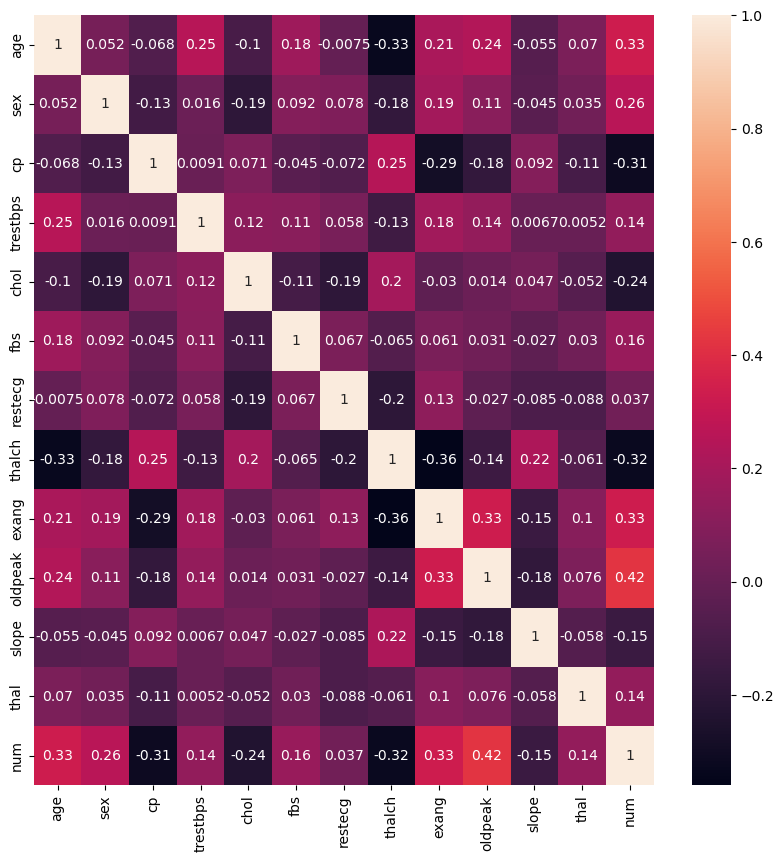

In [21]:
#heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Decision tree classification 

In [23]:
#dividing data into target and features
target=data['num']
features=data.drop('num',axis=1)

#splitting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

#shape of training and testing set
x_train.shape,x_test.shape,y_train.shape,y_test.shape



((726, 12), (182, 12), (726,), (182,))

# Building decision tree classifier using entropy

In [24]:
#building model using entropy criteria
from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

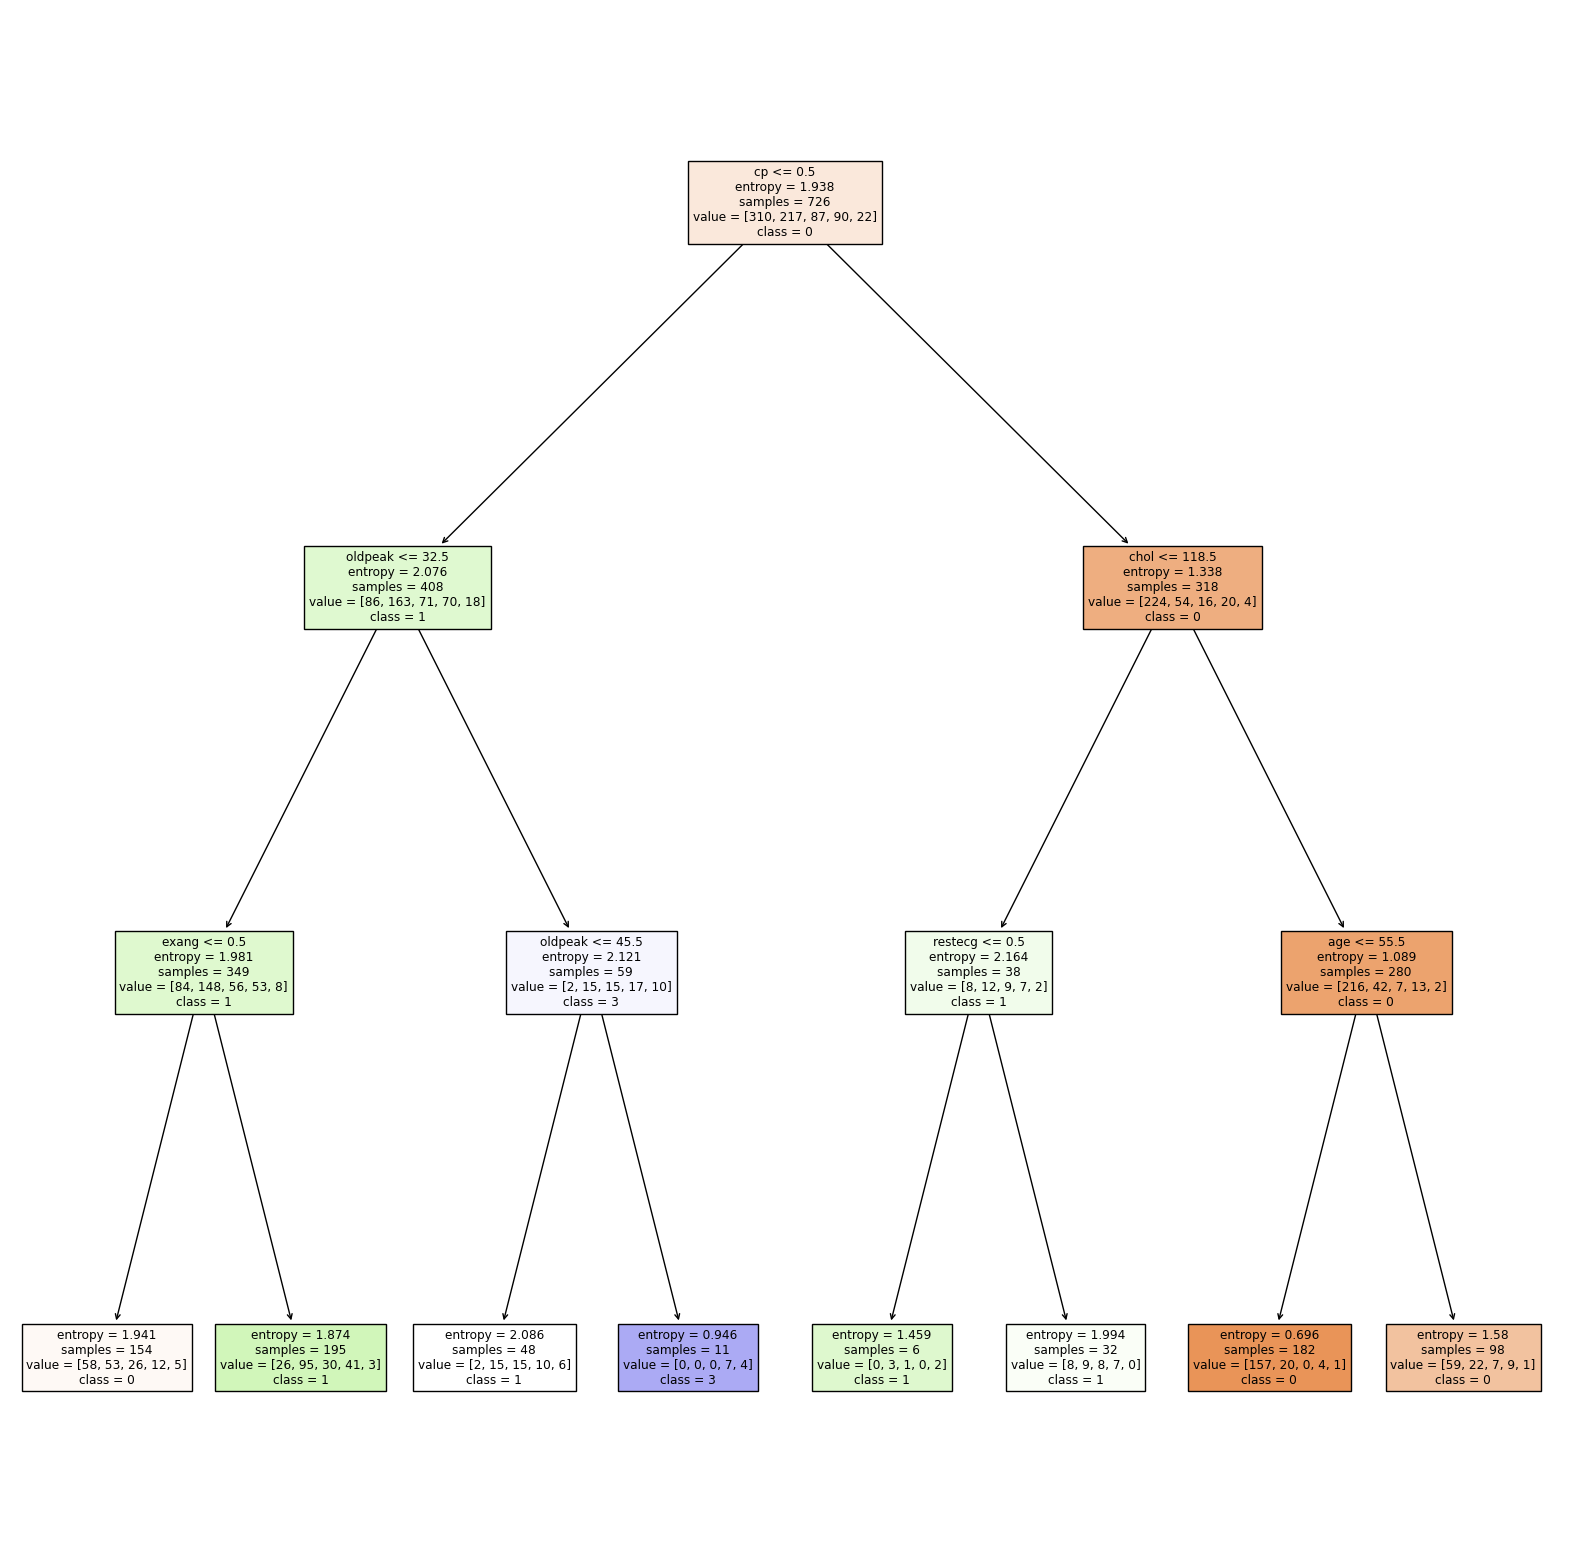

In [25]:
#plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model_entropy,filled=True,feature_names=features.columns,class_names=['0','1','2','3','4'])
plt.show()

In [26]:
#text format of the decision tree
from sklearn import tree
text=tree.export_text(model_entropy)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_9 <= 32.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.50
|   |   |   |--- class: 1
|   |--- feature_9 >  32.50
|   |   |--- feature_9 <= 45.50
|   |   |   |--- class: 1
|   |   |--- feature_9 >  45.50
|   |   |   |--- class: 3
|--- feature_2 >  0.50
|   |--- feature_4 <= 118.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 1
|   |--- feature_4 >  118.50
|   |   |--- feature_0 <= 55.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  55.50
|   |   |   |--- class: 0



In [27]:
#predicting on test data
y_pred1=model_entropy.predict(x_test)
pd.Series(y_pred1).value_counts()

0    117
1     62
3      3
Name: count, dtype: int64

In [28]:
#confusion matrix
pd.crosstab(y_test,y_pred1)

col_0,0,1,3
num,,,
0,77,12,0
1,22,24,2
2,7,14,1
3,8,9,0
4,3,3,0


In [29]:
#accuracy of model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.554945054945055

In [30]:
#model evaluation on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1,average='weighted')
recall=recall_score(y_test,y_pred1,average='weighted')
f1=f1_score(y_test,y_pred1,average='weighted')
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.554945054945055
precision: 0.4239192018348346
recall: 0.554945054945055
f1: 0.4806562369669165


# Building decison tree classifier using gini

In [32]:
#building model using gini criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

#fitting gini model
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
#Predicting on test data
y_pred2=model_gini.predict(x_test)
pd.Series(y_pred2).value_counts()

0    107
1     56
3     19
Name: count, dtype: int64

In [34]:
#confusion matrix
pd.crosstab(y_test,y_pred2)

col_0,0,1,3
num,,,
0,76,10,3
1,19,24,5
2,5,12,5
3,5,8,4
4,2,2,2


In [35]:
#accuracy of model
import numpy as np
np.mean(y_pred2==y_test)

0.5714285714285714

We can see that model performance is very low so we need to build a better model and for that we need to tune hyper parameters

# hyper parameters tunning 


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#Defining the model
model = DecisionTreeClassifier()

#Define the parameter distributions
param_dist = {
    'max_depth': randint(3, 15),  # Random integers between 3 and 15
    'min_samples_split': randint(2, 10),  # Random integers between 2 and 10
    'min_samples_leaf': randint(1, 5),  # Random integers between 1 and 5
    'criterion': ['gini', 'entropy']  # Choice between 'gini' and 'entropy'
}

#Creating the randomized search cv
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations to test
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',  # Scoring metric
    random_state=42
)

#fitting randomized search cv on model
random_search.fit(x_train, y_train)

#best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best Score: 0.5330940009447331


# Model evaluation and analysis

In [37]:
#fitting new model after hyper parameter tuning
final_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,min_samples_split=9)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=9)

In [39]:
y_pred_final=final_model.predict(x_test)
pd.crosstab(y_test,y_pred_final)


col_0,0,1,2,3,4
num,,,,,
0,72,13,2,2,0
1,18,23,3,3,1
2,4,10,5,3,0
3,6,4,3,4,0
4,1,3,1,1,0


In [40]:
#final model evaluation
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred_final)
precision=precision_score(y_test,y_pred_final,average='weighted')
recall=recall_score(y_test,y_pred_final,average='weighted')
f1=f1_score(y_test,y_pred_final,average='weighted')
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)

accuracy: 0.5714285714285714
precision: 0.5349650841846858
recall: 0.5714285714285714
f1: 0.5492223195714597


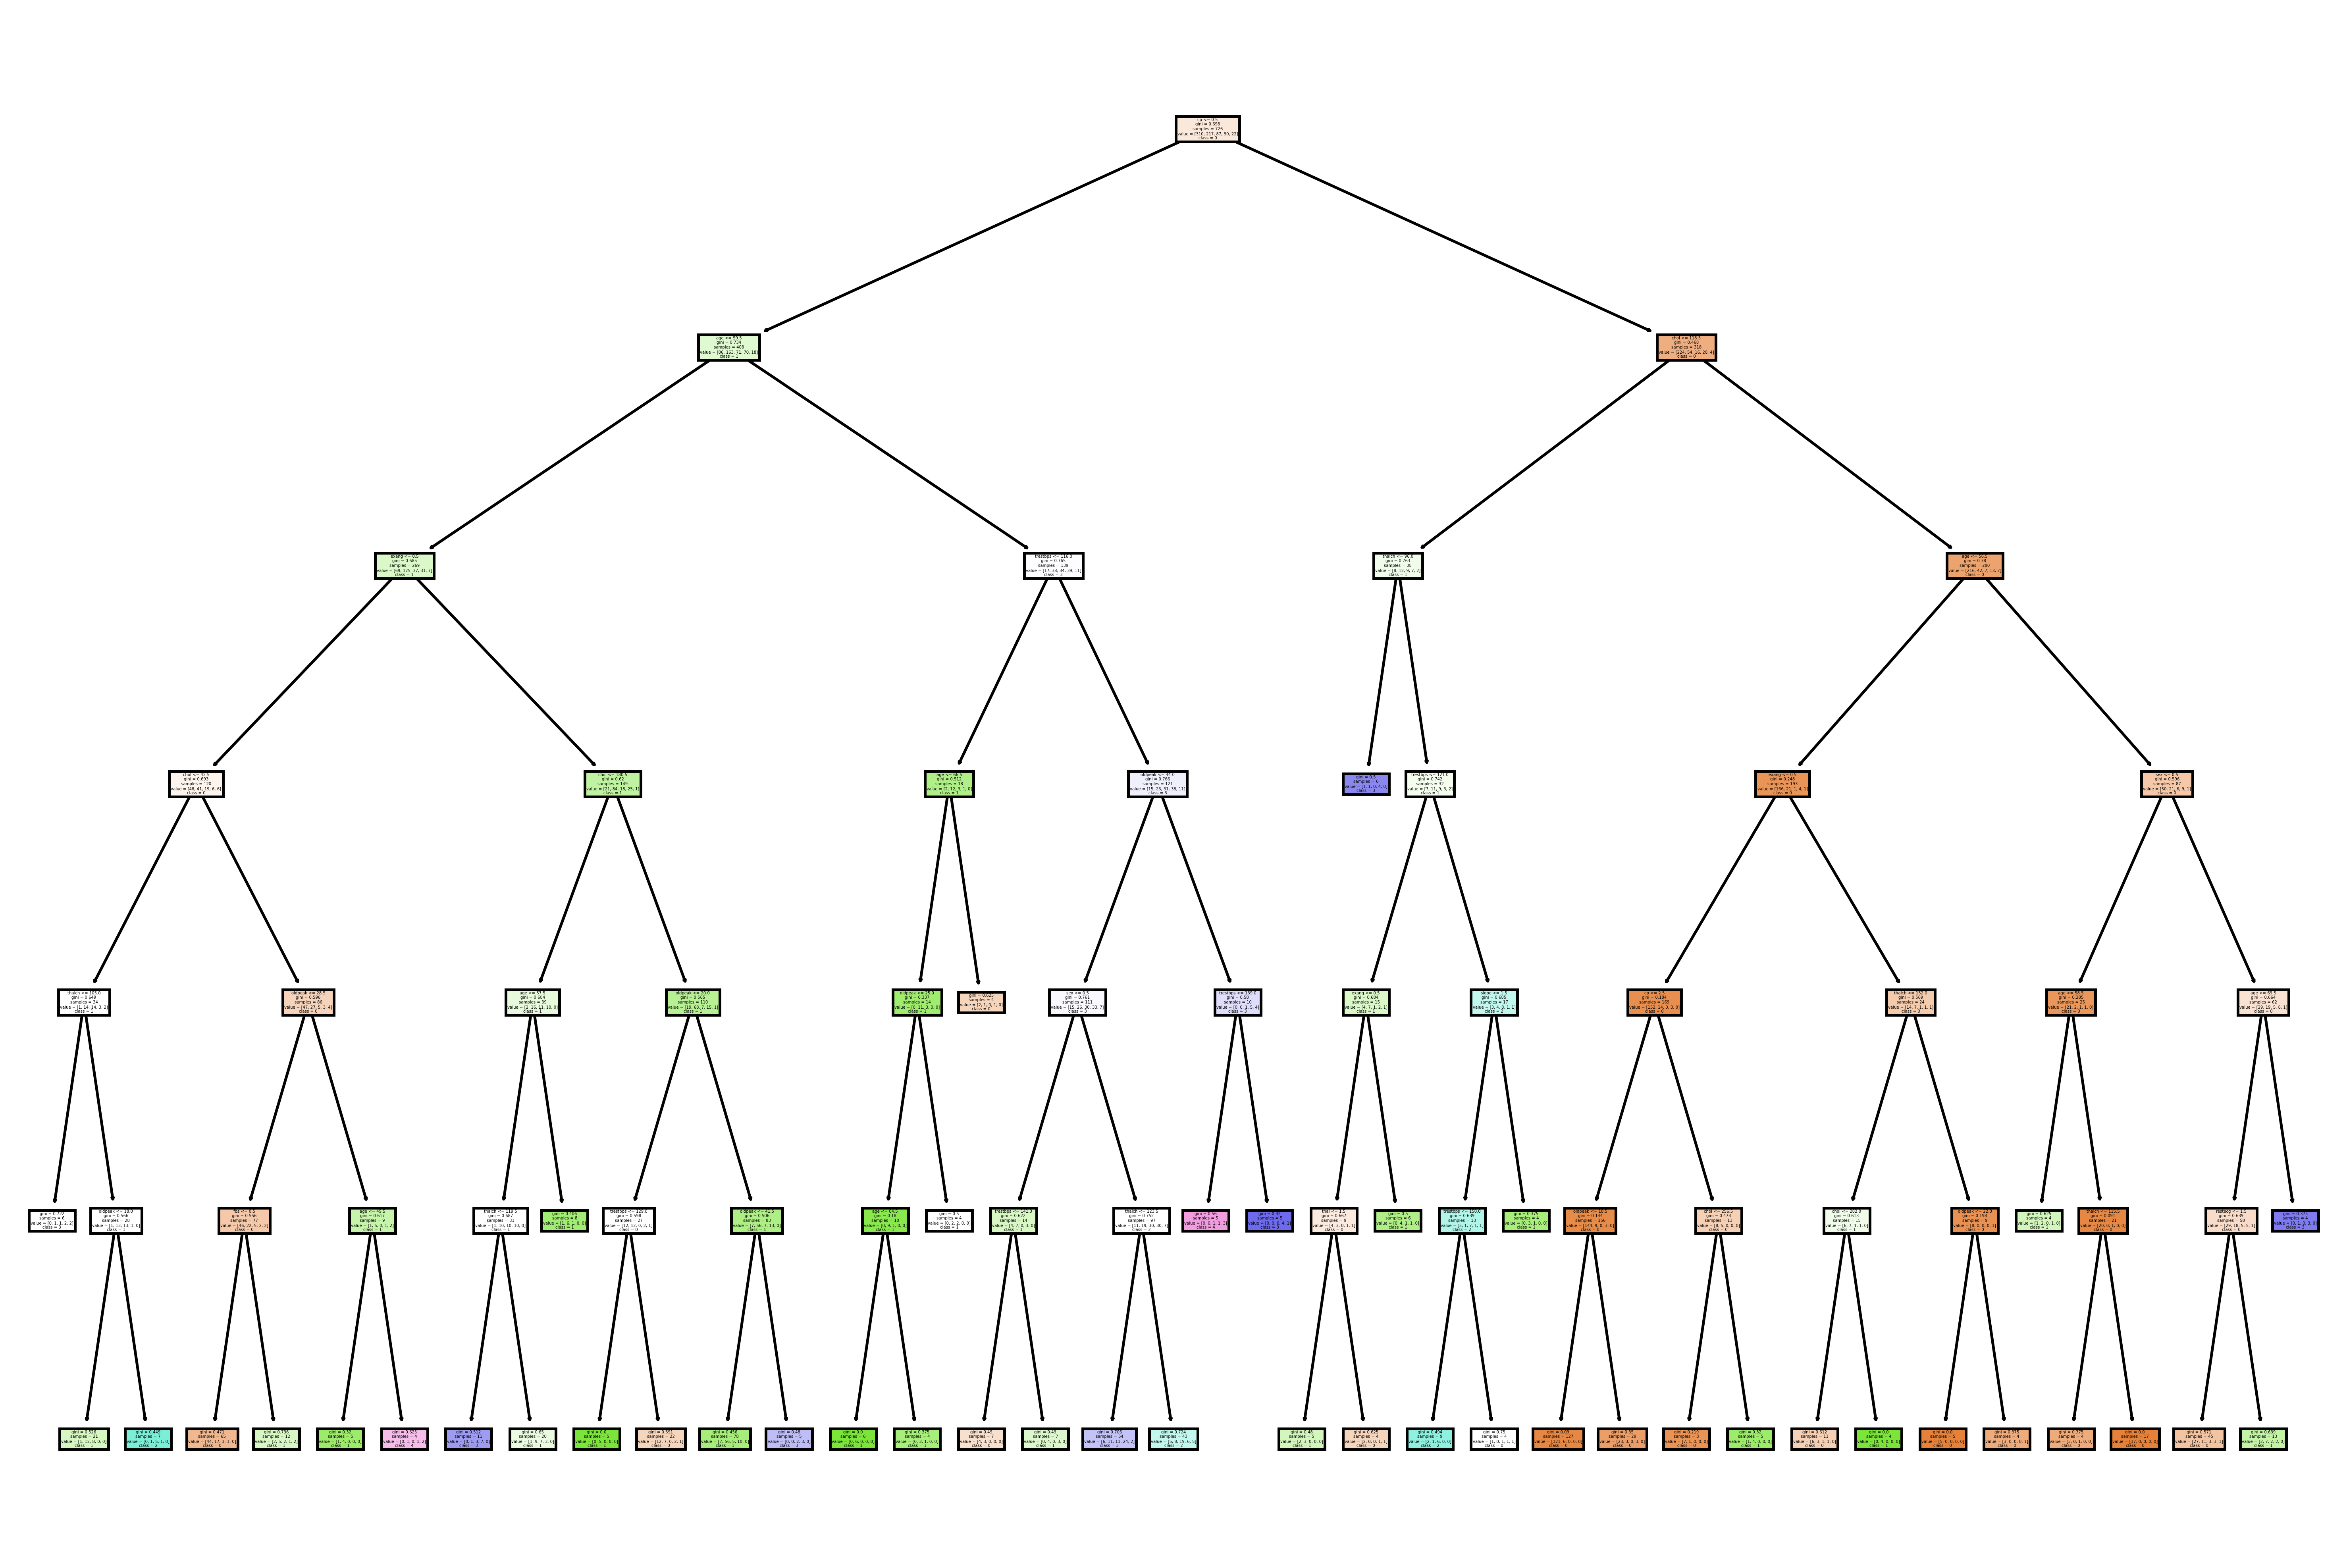

In [41]:
#plot of decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10),dpi=500)
plot_tree(final_model,filled=True,feature_names=features.columns,class_names=['0','1','2','3','4'])
plt.show()

In [42]:
#text format of tree
from sklearn import tree
text=tree.export_text(final_model)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 59.50
|   |   |--- feature_8 <= 0.50
|   |   |   |--- feature_4 <= 42.50
|   |   |   |   |--- feature_7 <= 105.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_7 >  105.00
|   |   |   |   |   |--- feature_9 <= 18.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_9 >  18.00
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_4 >  42.50
|   |   |   |   |--- feature_9 <= 28.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  28.50
|   |   |   |   |   |--- feature_0 <= 49.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  49.50
|   |   |   |   |   |   |--- class: 4
|   |   |--- feature_8 >  0.50
|   |   |   |--- feature_4 <= 180.50
|   |   |   |   |--- feature_0 <= 57.50
|   |   |   |   |   |--- feature_7 <= 119.50
|   |  

In [43]:
final_model.feature_importances_

array([0.13832829, 0.03320957, 0.31366722, 0.07064434, 0.16746503,
       0.01742503, 0.01577116, 0.07064359, 0.06877303, 0.08881312,
       0.00954901, 0.00571061])

In [44]:
feature_imp=pd.Series(final_model.feature_importances_,index=features.columns).sort_values(ascending=False)
feature_imp

cp          0.313667
chol        0.167465
age         0.138328
oldpeak     0.088813
trestbps    0.070644
thalch      0.070644
exang       0.068773
sex         0.033210
fbs         0.017425
restecg     0.015771
slope       0.009549
thal        0.005711
dtype: float64

<Axes: >

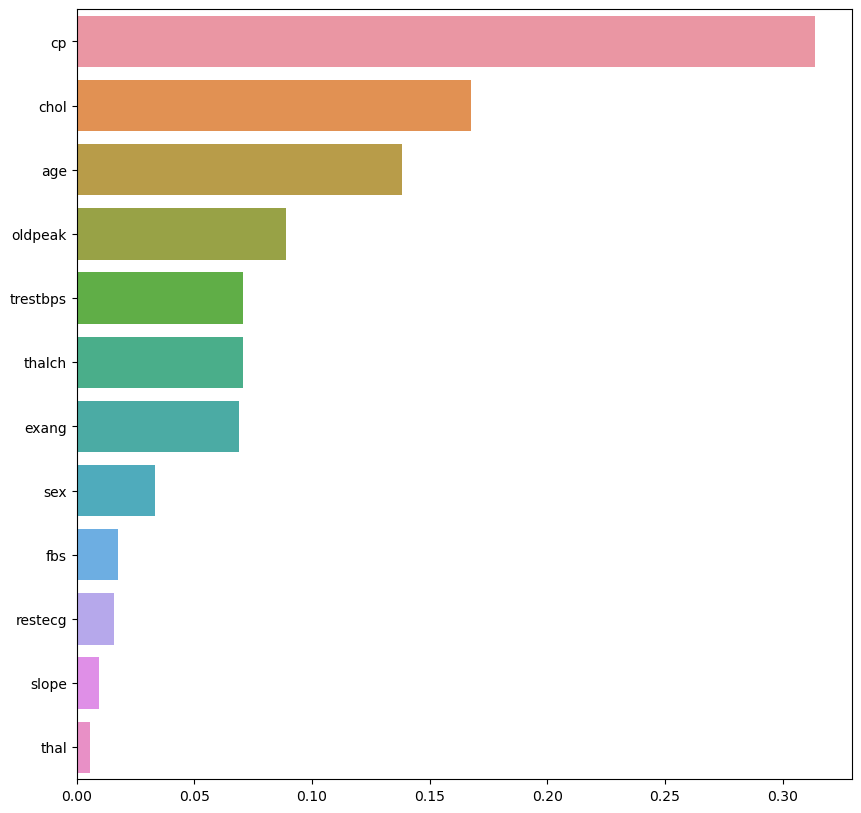

In [45]:
#creating barplot for feature importance
plt.figure(figsize=(10,10))
sns.barplot(x=feature_imp,y=feature_imp.index)

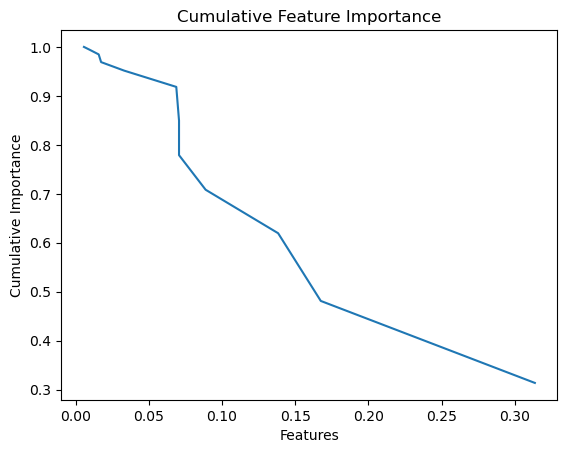

In [46]:
# Calculating cumulative importance
cumulative_importance = np.cumsum(feature_imp)

# Visualization of cumulative importance
plt.plot(feature_imp, cumulative_importance)
plt.xlabel('Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.show()

In [47]:
#cumulative importance of features
cumulative_importance

cp          0.313667
chol        0.481132
age         0.619461
oldpeak     0.708274
trestbps    0.778918
thalch      0.849562
exang       0.918335
sex         0.951544
fbs         0.968969
restecg     0.984740
slope       0.994289
thal        1.000000
dtype: float64

Analysis about feature importance:

Most important features for the fitted model are cp, chol, age, exang, trestbps, thalch, oldpeak as together they contribute 91% to the model.

Interview Questions:
1) Common Hyper parameters in Decision Tree:

Criteria: Determines quality of a split decision tree, it can influence shape and size of tree. Gini impurity is oftern deafult.

Max Depth: Gives maximum limit for depth of the tree. A deeper tree can capture more complex patterns but may overfit

Min Samples Split: Specifies minimum number of samples required to split internal node. A high value can prevent overfitting.

Min Samples leaf: Specifies minimum number of sammples required to be at a leaf node. A higher value can prevent overfitting

Max Features: controls number of features considered at each split.

Random State: controls randomness in algorithm. Setting a random state ensures reproducibility of results.

Splitter: Determines strategy used to chose the split feature. Random splitting can help prevent overfitting by introducing randomness.

================================================

2) Difference between Label Encoding and One-hot Encoding

Label encoding and one-hot encoding are two common techniques used to convert categorical data into a numerical format.

Difference:

Label Encoding: Assigns a unique numerical label to each category.

Example: If categories are "red", "green", and "blue", they are encoded as 0, 1, and 2.

It is suitable for ordinal data (where categories have a natural order, like "low", "medium", "high") or when the number of categories is small.

One-hot Encoding: Creates a new binary feature for each category, where 1 indicates the presence of the category and 0 indicates its absence.

Example: For the categories "red", "green", and "blue", one-hot encoding would create three new features: "red" (0, 1, 0), "green" (1, 0, 0), and "blue" (0, 0, 1).

Suitable for nominal data (where categories have no inherent order) or when there are a large number of categories.